<a href="https://colab.research.google.com/github/rukmals/ColabProject/blob/master/FlowerClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from IPython.display import Image
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228818944/228813984 [==============================] - 2s 0us/step


In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [ ]:
tulips = list(data_dir.glob('tulips/*'))
print(len(tulips))

799


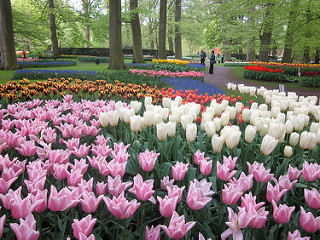

In [ ]:
PIL.Image.open(str(tulips[0]))

In [ ]:
List = ["tulips","roses", "daisy","dandelion","sunflowers"]

In [ ]:
roses = list(data_dir.glob('roses/*'))
daisy = list(data_dir.glob('daisy/*'))
dandelion = list(data_dir.glob('dandelion/*'))
sunflowers = list(data_dir.glob('sunflowers/*'))

print(len(roses)) 
print(len(daisy))
print(len(dandelion))
print(len(sunflowers))

641
633
898
699


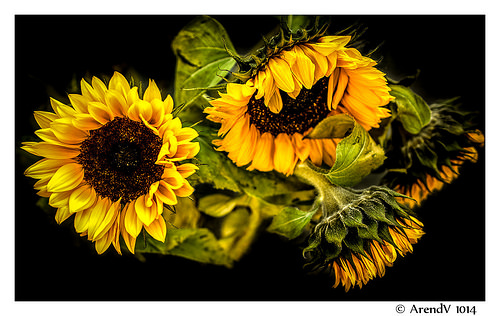

In [ ]:

PIL.Image.open(str(sunflowers[0]))

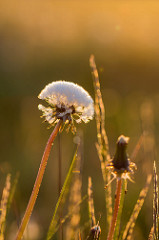

In [ ]:

PIL.Image.open(str(dandelion[0]))

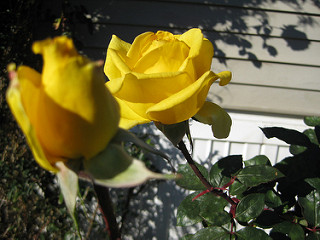

In [ ]:
PIL.Image.open(str(roses[0]))


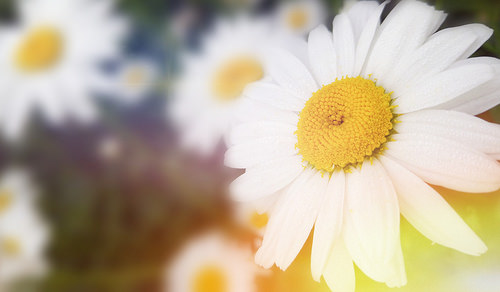

In [ ]:
PIL.Image.open(str(daisy[0]))

In [3]:
batch_size = 32
img_height = 180
img_width = 180

In [4]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [5]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [6]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


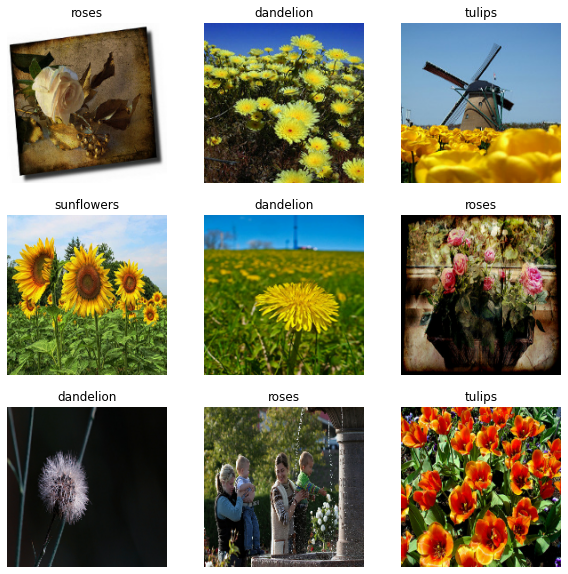

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [7]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [8]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [9]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.99702257


In [10]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [11]:
num_classes = 5
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)       

In [15]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

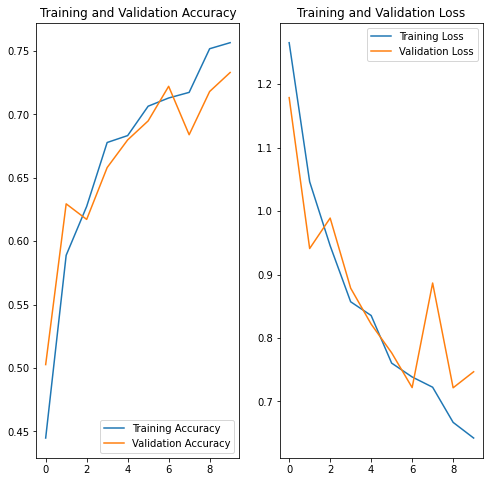

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
#roses_url = "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMTEhUTExMVFhUXFRUYGBgYFxcVFxUYGBcWFxUXFRgYHSggGBslGxYVITEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OGhAQGy0lICYtLS03LS0tLS0tLTEtLS0tMjAtLS0tLS0tLS0tLTYtLTctLS0tLS0tLS0tLS0tLS0tLf/AABEIAKgBLAMBIgACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAAGAQIDBAUABwj/xABEEAABAwIDBQUFBgUBBgcAAAABAAIRAyEEEjEFQVFhcQYTIoGRMkKhsfAHUmLB0eEUI3KC8ZIzQ1OissIVFmODk9Li/8QAGwEAAgMBAQEAAAAAAAAAAAAAAQIDBAUABgf/xAAtEQACAgEDAwEHBQEBAAAAAAAAAQIRAwQSIQUxQVETImFxgcHwFDKRobHRU//aAAwDAQACEQMRAD8AFaVKQN6dkIFj63TaTBaDBU2dw1EjiLrPlZpojDyNR5i4UjKoKe1zXaJj6HQqPgceAPqydm+iqZaRvI+ua7+JcNQD8F206y4HJCPoKq3FjeCFMysDoUrTQbOlIwlP13SmZeBQCP73j8f1Sl3qpdq7PqUHmnUbDoB5EESCPrUFUief6IKnyjrJw4jUJRG5VGYi8FWxh3mn3uU5M2TNuzQTAPQIvg6xrgmkJQ5cXAoWEjc1RuYpiEhTWdRXLf8ABUDqfCytkJrmTYeiZSA0Vu8I1Cex3D0XoeM7MUn02MPhexoaHjWwvmG8TJ80GbR7PVqVRrCPaIDXt9k8Z4R+Sq4NdhzNpOmJZA2i7J3kHLMTulROKPKFBrGCmB4QIvv4z1/NCnaDZ3cuDm/7Nxt+E8D+STT66OWbh29PiFmb3ZMAAkmwAEkk6ADeid3YZwwj6jpFeMwYDZrRq08XEehAC1OxOxQxor1B/McPAD7jT739R+A6mDFjt5VXV9ScZ7Mfh8/8EbPCMxFjfhxWzV2LVZQNZ4y+zDD7VyBLvu9NeiM8LsajTqvqsEkvcWz7gO5o3dVJtzDd5h6reLCR1Fx8QmydVi5xjBcWrYTzTvE8OVbD0nvcGsa57joGgknyC3cV2XxFHDur1crQMvgnM6CQJMWGo3las5xi0m+4NxlrpUIen50aGskzJZUYXArgkwSFqa1yc4ogK76S5mHUsqxSFkUxWhW8wnscRzCVg80pYEWzkcWtdyPouAcOfmmOC4DgfzSMZEnfT+6a5rTqI+uSbmPCUgfwKWg2NdSCrvocEd7C7IsxeFbVbULKsvBBAcww4xpBFovfosDbGw62GMVWQDo4XY7o78jdRx1EHJxT5XgFp8EfY3Duq43D0zcd4HHozxn/AKV6ftjsZSq1mVmEMOdrqjY8LxILo+64+h+KDvs0pD+MLj7tJ59S1vyJXq7TKz9bqHGdR9CKbakDvbLYAxVKWj+cwEsP3uLDyO7gfNePvbBjQg6cDwK+gCvJ/tK2T3OIFZlmVpJ4CoPa9RB65lB03U+97KX0Hg/BgbE2M7FV20mWm7nbmtHtOP1qQvXsX2fpOwhwrBlaGw08HC4ceJzXPGSsn7OdmCnQzn/aVLu/C0ey38z15Itp71FrdW55Eovhf6CT5Pn+qSxxa4Q5pLSOBBgj1Sd6t/7Q8MG46oW6PDH+ZEH4gnzQxlK3MUlkgpeqJUy1mSzyTcFgK1XN3bC/LExFpmLHoVLU2fXZ7VKoP7TC5yinVqw2POFflDg2QRIIvxG7TQqXYtLNiKQP32k9GnMfgFq7Pd/Kpn8P/c5aGHjMHQMw0MXFoWfl1jjujXqGrQQtKrbUrQ0N4n5JuHxM23qhtWrNQDgB+ZWDjg95yjyJKldQa8ZXtDhIMG4sZHyUDFboOEhTO1yjmi5RxF0zGY3N4RoNeZVTalTuyCPeAjrp+Sgwd0ix8bgbfJoUwp8kiFHTCt0GSo/IjMbs7QZTGVjQ3id56nUq92rbOCrz/wAM/CCFn7CdJJ3SVr7SDK1F9GSA8QXCJAm8SrvtKyqUn5Qs48nikRofJPbW42XquA7I4Rv+6zni9xdPlZvwUvabAUKODrubRpNPdloIY0EF3hEGNZK2V1TFKSjFN2LdHlTXp4cqeXgnNqnetLaGy3KdKrsqhSNchQ1kgKka4qIFPAXALdM71LKVlKwhKRxSthQ3LzUZB+v1UpCRLYSLMtEbAxLmB4oVHNcAWuDS4EHQiFUXq/2e4vPg2tm9NzmHpOZvwd8FBqMzxx3JCydGZ9mgeylWpPa5pbUDocCDD2xaebD6osxFBtRhY9oc1wgg3BVyFEWrzupm5zc1wRXbsBKew3YHEOq0yXUXsLQTqw5mnK7iLWPrzLdlbQDwu2q+m2k7vSAwiCSY10jnKFdl7Wo06Re6pAmJ3GLgjn4tOifHhz6tpvh+vh19yZR3RsOHvA1P0NVh9r8C2vhnB0HIRUHVtz6tJHms6t2ga5kh7c0jLeJMgEedx5qxtHETSflMwwiOJcIH6ILSZIR9t2qv5uqCoNNGn2awvd0Gz7TvEeU6DyHxlWcZiMo6rMwu1Id3WpEFx4ZzZvMwCfTisftntB+ZtGnYubJd91u8jnp6qrLHkeb2cuH/AIdscpAltOjVx+Nqdy2Q2G5iYaA20k9c2l1t4/srQwmDrVKh72rkgE2a1ziGjI3z1M6blp9j6AYCGiAq/wBpuKjDMpf8SoJ/pYJ+ZarkdZknqIafHxFV82l6jSTToGew+IAqvbpmZP8ApcP/ALFGJqLzXYWI7qux0+GYdwh1pPSZ8l6KE/VcdZt3qgpGZtlvjB4t/MqtSK0dsU5YHcD8D+8LMolQY3cESxXBewzocCotu0y2oxw9l49CP8hc2pGu/Q8DuTsbjGOow8gZXtgncT4QPipseCanGdXF8BqnZXo11YFUC5MAu18kGdpdpPY8U2OyzcuEgi9gD9frk4vbb3NLH1JaTv5E8N+noFtYOnbd19mJPJFMO9o7Vp12DunBzgBIFyAL39XE8JTNmbXZcExBAH4iQTA9PiEBfxtNogPvfSfq8lXNm4inlvUbnO4nf5/VhxUuTpuOUUqdJUIssXxaPQsLjtLgg8OZ/wArXqbQaym/7wbA5udYDykFef7ML8heCZc8kHjuEcOH+VZq41waS6xPhk8ZuY3WB5qjn6cpTc0NsTN3ZbdwNhrzK3aDEPbLrNYwSUR4CpIG62m8cJWPmxyvc1wJkNGgyEI/ahjw2jTog3e7Mf6Wf/oj0RixwAkmALk8BvlAmKr/AMTiDUjw2DZ3NGnrc+am0lRmptdiKMbPPVxavZcLs9hEOY13VoPzCDvtDZQpllKlSptefG8ta1pi4aLDfc+QW1g16yzUFEAEZUrXkc1yUtWicSsqqcOVNrU4LqOs3mvEXEJxaomlOjh9eSiYyHZU3KnFx69f1RJ2HNB1fu61Jri4eAuuA4SS2NDInUajmock9kXLvQW6QN06cmGiTwFyfJGv2e1KlCs5lRj2sqtsXNcBnbcaiLgu9Ajyi0NENAaOAAA9AnkrJz9QUoNKP9kbnfBI2qCsfHbbp0nd25zQ8zkzSGOI90vAhp6pu3MXToND3vySYBgkT+INuBzhed7QovqVXVHPa8OiHsMAxpmEkAj05KDR6d6iac019yTHjTNJm3MTNWliKQqUySMpLS9gOlwA1+69uMrDxG0aFMSwkyRLBobkQ6bB2vP4LP2lth3sNd4BDSYEuDtNd2unwQ9iKkRETPEEGCIn+kDrJXs8GhjGPvcL0RWy6xRe3H/Ju4vbdBz2jIe7bIIka3JgaBzTv4W4LU2dtt2SoaIJa0tlrpzAtzZRw4HjcckEVXDSLC4MCxm4nSTpHNPweLqiKTajzJkNBJaHEiQeN+Am/qc+ixyjSFx62e73uUep7AxbXM79zr1AHekMDusNAHRbWC2aMRUNWpOWAAAbuguMTrFxfkvMqXfOrhjCXZ2eGbZcpGbNMQBO+/mvUdj45jIpA5srWgncDb1JmfNeR6pinD34flv8RqS/ba7lwNp0S7KA0bgOi817bbSNfEGD4aYyDrMvPrb+1b/aPbZEhh8bpjfBOvWJQvg9hVahAloJ4yT5woenYY4m8+V16CbGZ1HDPdeBHGUWYTbBaxrXtzOAgkGJjTdrCq4nYtTDQ17muDvE0g34OBab8L6XVZwVrUZIZ68rwSQimrN1m22OBa5hANjBBVR5DTI8TdxH1YrMaVewmLDfaEt3jeRyUOLDse6Cv4EqjQzF48AGdIvGp4ZRvJ+ZQRt7bZqACHMIcZAdINouRqRfS1ytHtXtBgLqdIkgi7iIIBvljiLX5lBROY8tByXotJhi1uSq+Sjqs23hE1XFOdAn2RAB4cOiaGW4FI0H94j5/V0ucEa68baG54748lpxikjLlJydsVjfrWU7f9bt3JcXeICLBttwHJNY2QACRJ/z8k4hrbM25VplpLiWhuUNt5dN90UbNxFKvDp8Y9w+6Tv5mN+66BxTJiBYTeQbjXzU+Cxb6T8zCA6DfkDpy3KDLgUu3cs4dTKDp8o9EeXNkmOPADoFtbE2iSQLFu9xt9QsLZ+LZiKbXiCQBO+HReyYa7s5bm1OnD6usPWYIyi93dGpxJcBVtfGVK4NKiDk950gZvwiTpx4/OXZGx3MEkCeoTti025QAQY4GVu0gvPObj7qXBDKVcIhcCxpdlc6ATDRJMDQDiV4nt6vXdXfUxDH03vcTDmubA0DWyLgCAveZUdZgcMrgHA6ggEHqCrGl1q07bcbsiPn0OT9Vt9t6mG7/LhabWhsh7mk5Xu/CNABxGqH2vXpcUt8FKqv1OsmaFIFGxyklOE0aNSQFKXKhhzby3H8iphU4/ohKIYsuMetHY2Aq16rWUR4/aBnLlgjxSeFuaxWv5q7gMa+k9tRjiHNMgj8+I3eagnF1wMe3U6T2sb3haXwMxbIaXb4lK16rbA24zE0BUILDo5pBid+Un2m8wnYupTptc/OQACd5A9BMLymoxSWXbHvfYiS9QJ7d9o2uDsOylmcCcxcW+EiQPDBteZBDhpZBJxrqbIdYuETEjzUm0NoPq13PNNrZPuxfqRZ3WFl7WxZLoOjTa4tprbjvXten6ZRSj4Q2on7LFx3ZRqVQZIJB8JJkTbgL+nFRd5ckQLCx/qIDnbpkTPALnu0mYF9ABJHiB3zBAHmqzsSbcrG1yIkE6Rr8TbWdlyMhIX2jlIm7t0nxPzXGo0P+oJWO4uDdfbbIkEEOIaDIHTyNlDUefCZNzcgWJ3SeFjborOAkujK6QTLQM9hIJFjDSdZChbJEjer1qwDBIzkgMcwjK8AtlttB8svofYTDmlTNV7hOX2BusSSTPX1XnT6rsT3bKDMtVtRvgEARDvFoAPZMr13YdAQKVYMe805fIaQT70N91vDjC8p1V+zx3KPn+PibsMnu2nZ55hyXOB1d8uaK8O8Yan3hGZ5sxn3jxPBo3lU8Zh6GHrPAMtDjbU8m8408lJXxGcgzNrdOSzM8vaU69384J5STVIy+5qVahq1XkuPDQDgOAjcuq0YK02NUrqAIv68EJZ23yBUjCdSUFehIu4A89P2WhXyA2dPQT81nYqlUcCWsc4DXLJjqFf00vjX58SVMFO0dWi3M3KXVBDcwd4QYlzhGp0EaazKH6UDeRa/5T5lanabBllSC5su8RAJ8MgEZpFjB0us+kJsGTPMab/yPovT4EtvBg6qTeR2PqOy3tPEcLXJiwuLXSFmpgkGx1BFzeNVIaZOXM4FujWneBc5p6Bccsh2R0QCXOOsTu37h5KcrEDXb7mJAiNBrKlpsEg5h4TPKLwPgow8OEnTod4EnS97eR5J7KYsIbAN+Plz8M+aKYCy0WEtADQ90nhPzkn0TajLzETYdL8NdCpqDv5gOp4atbmFgbb/AAnl5KFz5FzLhuvAnxTO8fmiA3+xdUCtkMw8WvAEadSbeqMamCpskxcnUy4/r5BeaYB7u+blgukEXgggwPgAekL0qvhXluapVaAR7LfCR1Lic3wWbrFTtGpo5+7TLfZqq7PvO6L26oypuQJs3aVKhaS7m0D9VqntL9xnqfyC8lq45JZG9pNODbClzwNSvPu2XbDMDQw7vCbPqD3hvazlxO/crWOrVMQC15OU+6JA84ufNYG0OydQDNS8Q+6fa/t4/Wql0OHFGe7K+fC8EcotAs4Jhap3tgkEEEWINiOoUa9KmJQxphPFRcGpcifgBZosMDQ9dVIKkbiPirdCmCEpoJJTQyiaHZ3s9VxclkNYDDnkwAdYy6kx5c16HsjsthsPBy948e+8A35N0b8+a842PtGphqmen0cPdeODh+eoXpGxO0VHEgAHJU303G/9p0cOl+SxOpvUd4ft+H3OaZsEqLFV202l1T2N5guAB+9A05qaEyvGUzMRuJBtwymfReew1LLG/XwMjx7FsqNrOg0n0y4lrqXsQdAB7vRD+KJJkRxIjU8P05om2jSqCoSMQyoCT7Jh2vvNN58yhTEiHG8mSPF4XONxrvAEr6RofP0INenUSImXEAkazME7vCDpPim+8cEw4cDW95uL7r6DWOHuSka1xMkt0sADlG4EnrFuQ4Skr0zOotBFjpBzCYNoB37+gVxmehXmDmmBHON0GDABsdBv6LT2CcP4hVcZcQGlxdTGa/suEFp01McrKhh4cWwXAODRZswSMs5ReJIESVsDZz6A70VJBY0vaWEtdAAmXEQYHAQqmpnGMKbpstabHKU00rovYAPOPD8tRzKbAwlp0c4y3O60C2vTijfZ2JGFp1ar2lj3uysBIe4uN7GAC0C/kh7sPs0nCVKveuzVC/PBMUoJ8OUXLoi3KBvUFbEGu8OAy0h4aY4N4n8R1PpuXmNW45W8b7R4b+31+xtY0pr5kmOoEHMXF2aTJuSdbqLCYwsMG7fl0RDtvC93s99Ui7Mjv+cNP/UgeltNjt9/T5o6V/qMT4tJ0RTnFTqw3oYhmXPNvjPCOKoYvFl/IcP14qhg6rS0Bu7Ub54qVU3hUJsmh6nOcq2JxGUWcWzwdlnrxVk0pUZwIOvqVYwygn7xNfAL9pATh8wpAguGasQHHMDlawGZaIA6zdDNIjf5xaBw6I+xVCmZplrqjfaDWiA54BDQRBJbJQBWpFjyw2IMHyMQV6TSzUomNrsbU7JgA4EZfN03vbnpKc+HeE3OgG5o3mBB3fJQmpM30Fud79dycXzm3SBprwiSrhQEqCb84B+eUE3Kc0GTNoIIP7/WpTGbtwGg3nmnZ4iTMzI+PwXHFum61/Zhwm+8QAN+kDMdxHFNNSQBaG25GSDM7hYDyUFMRIAGXWDJ00152T21CbwbzMdBe+t9/JGwFzZ095TAJnM0SBu/aV6RjNoMaDlDiY3NI8ySEEdkGTiC4hzoEgAEw4j95niESbTxFWRmY5rAdOP9R3enqqGqdyo0tGqjZpbCod6ZcbdAT8kWUtn04gtB6hBnZ0P7xpAsdb2R5RXk9day/usnyN2VnbKAuz0P5FdSZBg2PBaQcosRSzDgdx4deSqb/Uitgx2q2DQqsNRzm0ntH+0NgeT+Pz66LzE66/utbtZWxPfFmJN23aBZkHRzBwPE3WIHL0+ixShjVysWywwKQNUDHqTOrZxsUhb6K74KBlQj/P6qRlfj+ijkmOmSz0+SLOyPZU4iKtYFtKfCAYNSOB3N56ndxQlRqtBBLZEiRNjyJF16r2d7V0cRFMNNN4b7AEtAb90gWGmoG4KjrJ5IY7gvr6Ak34Nt7ABFgAI6AKjXqs0ufl8U/EVcx5cE1oXk3Kp7hoKgI7SbEfVqOqsc3KG6uzNIgGAY8MTvgea8+2zRIObO0iIc5pBgcAefmvZu0eFpPpFtQccro8TTvyoHxew2ta0NY6QHSTl8QzZgXCZ0JHkF7Tp2suKb7/nnj+lQ2TH7WG08+G7jIkkjwmd99TJEDcUjcM6o7KwS8teBBk2OoFtwid8dEV1dh4cF2aQCWPbqSInvGFsyQZ11GURvCpNwdFr3Sycz/wCXNO7SZkBzbxpHCLQtierhXBRjosl8mfR2W50P8THAt9um9wOSbmRHDXnyV5tKviA4sOWnSaNLCo6QJgk+AXtfSFsYfYb6lUCo53dsEubLoJI8LCSZdumei2sFsgtwzKTR/McPF/eS9w6AlZOq1sUt0qvwaOHTrHwS9lKPf2LchDw9xZ4WPcfaJbuJN9dZWdgqM4lzQIb3r4G7KKjg2OUQjTDYcYLDEiC8C34nn2R6/ALzvZvaA0sv8oueBYkkgniYuVh4p5NS8koL0S/vkmWVRbfgPu2dSm3AvpucAXhoa3e6HNJgdBqvIK+zGm7SQiHEYirWeale7jzgAbmtaNArGy8KHOJizfnu/M+S0dHgehwO38X8zInnx5MixpW35G9mdj900ueZe7QbmjpxO/0Wx/A/d9CpmhWKQWRm1E5zc2akEoRpFalhOIWdtV59lsQDcohqWaTwBPoEN1BK7Tze7d6E0HZkvAaTlzSQQSDBIOonVYG1tnUySfYsA0zaWjxZt8nd5oprMy6XJ0UD8GS1175TYaHfB4hbuDUbVvkwZscciqjzok6aD5qQH4eXRFWIwTJLTTaXbgYaybTB3e9qYtG+2CNjPIJGl4k6wtiGeMkY2TTSi+OSi11p3dfjdKB6/W/epqmBqtd4qZkDfzgggdCFK3ZVcj2DpOo9blS74+pD7OXoVmmwndqNIurWBwz6hAYDMkSbRJ3rSwPZ8m9V+URoIPxNgt2h3OHENm5E+9rvPAW+KhnqEv28ljFpJPmXCLWF2dRoUw0nxW8TS5riTrlLbx1KmG0LZGue/mSCRpFz7W9U6TKTzDAOfDo3h9WWvs7Y57wEslp1jTqVk588Enb5NBUuC/sE5TDjB+6RlPUA6jpIRPSrDiqlfZVOpS7siw9k6lp4ifkhxjatJxYXOBHMxyIXnppZ25J8icSDVrlU2ltmhQE1ajWn7urj0aLoV2phq9amWtq1GuFxD3NBPB0G4K86qNc1xDgQ4Egg6zvlW9J06OXmUvoiKXAUdsO07MVlayjAaZFR3txvAAsAbak6bkMJoclW/ixRxRUI9hB7U5MBTpUxxu92NxTTS6fXRMyFcAVEyRCuojh+a9a7I7A/hsMMw/m1AHPnUfdZ5A+pK8la9w0K0KW38U3SvWH/ALjiPQlU9XhnmhsToDV9j1mE5zg0Sf8APReUDtNif+PU9UfdncG5tBtSq5z6tUZyXkuIafYbfQReOJK89qunvBDdKQSy9peczhp7LeHVQ/8Ah4c4ZzmvmjcTuLum4ftF4NUzGKth1U8fHj8+3BLvow9qbLa8ybtbeNxPP6+QVBuzGhwqBsnQTo0DWOCIq8PGVukwSNDGsec+ilpYYQBuV3L1aTVJVx+f0OslIx67G0qVWo/2S7MOMSMselle2XiqDmd4x7Mu8kgZeTp9k9UJfaRtM52YdmjRmf8A1H2R5C/9yo7CoGoxgG+Z/wBRTZMDy6dZcrq/8Avf8hdiq/8AEGQPA0+Hn+L9F57RwgkuIIuY3b16lSoCnTPBrSfQSvPazVa6G1LfXZV9zJ6pqHjjGEfNlZyrucQZBIPLVWHhJQpyZ4L0FGIp1yWqOOqNFzPX9lZbt7KJcz0P7KlUCqYiwJIkb1VnosE+8ft/hdw63MuFI1Kfad1ap3LaTQ0tcS7MXGIOlgBeBv1SwgsOcxx7tzmzYEEiROnyR3Sw8Q0kkgAE8SBBPmVm6vT48FbOEz0enm2uRjKYOoVgtZTY95A8LSR1i3xU1DCjiVHteh4WgcT+yz1NOSVk926ArFkkNB1iT1KdhcASM4iQTuFxbWdVvM2YDqrrcF4YC1P10UwSaBCvQfJtrEETuOpmSTbWUzFVY8MGSOJi+sAcRbzKOcPsgZSTua+fMW/P1Q0zA53gkbr9VNj10ZR+QlJlHBh+TXTiAY9dQrLdnFrA4t8M6jQcJG5EeH2UMsBEGz8KGtykAgiCIkFVs3VFGnHn4CtpICtlbOBqW6o3wlKBCpdzTp1SwQJAcJ1IPzggrTYFmavO8sr8CSdk7XLO21REB/Cx6H9/mrwUG0m/yqn9Dj6CR8lVxtqaEKmFghCnb7ZAtiGjWGv/AO135eibh+2TGi1Jx8wP1VfaXbB1Wm+n3TA17S0yS4id40utzTafUY8qlXHz8CugVLEsKSEoC3LFoYEsJ8JciNgNp1NNLDxSB/X5pW1OhUTslQwkjclDwnl3JISClCXdh4EV8RSpbnPAP9Iu7/lBXrNZ0utpoOm5eW9nNotw1bvsmchrg0ZsoBdaSYO6fVae0O2+Ldan3dIfhbLv9Tp+ACytfpcmomlHshWnYa7QxtPDsz1XZRuHvO5NG9DH/mSpiqvd0gadMAk/fcBa5Ggkiw9SgvE4mo9xdUc5zjqSS4nzKK/s4phz6xjRjB6kn/tUGTQY9NhlkfLSGXHIabMoZaTAdYP/AFFWnOytLiQAASSdwGpT6YsAgTt72kDgcNQMj/ePGhj3G8RxPlxWPgwy1OVRj9X6C92CO18ca1apUGjnEjjl0b8AEWfZ3XYc1I+2DmbzadY6H5oDyHepKFZ7HB7HEOaZBBgg8l6nU6SOXB7JOvT6D2eudp8Tko5Rq8x/aLu/IeaB6gUtPtFUxIa2oAXtF3CwgG0DiZvp0T3U0/TdH+mwKD793+fI8x1LJJ52peCl3cmFaNGArNDDxf0S1GLRoobzNe1UsbUyiTcGx46LVqsEElC+Px+drRBBEz13JGX9FieWa448jMBTmrTGv8xnP3gjanqg3YlQGvS5vb8Tb4o1phYnUm90V8D1WN1ZcohOxlGWTwgrLxe3qNLV2Y/dbc+e4eapYzabqmUgw2xaB6yeJVLT6HNllaVL1ZX1OrjgVs02BWKTVVw1TMA76B3hWHVQ0SfrooMkZKTi+5YjNTipR7MftCvkpOg3cMo89fhKzcM0G/ryKgxWINR0nQaDgrOCbH1qpFDZChqpGnQKvUXrJoYlheWBwztAJb7wB0MbxzV6m5VckGnyRsze0Qmq2PuD5ldSY8CGucLbibKPGOzVSeED0/eVqYUWVjdtikF8I87f20xbHuaKswYgsYY+CmHbnFkEE0zII9iCJESIMIf29Sy4uuNwqvjpMj5qBi9N+l08kpbF69kVFJkzVI1RtTwVOOSAJ7UxpUkoMYdlXZU5dCAC73A/EDx/wuNM7nAqzTcU8sncClchkijLhqD5Lu9+iFcNGNJCY7Dk7weo/RDchqK2ccPQp0jiVI7D8WjyKhNEcx6ruGcPnmPkiPsbtlmGdVNSYcxsBtySCbcrE68ELilwd6pO7fyUWXDHLBwl2ZzCrbva+rWBYwGlTOoB8bv6nDQch8UNFQ5njcV3fHePULsWnhijtgqRyomgpIUPfjfCVtdqkphsuYTEFhMNuRA5XRZh6UwEHYaqM7b2zD5hFe0Ns06LcrSHVDrwb1P5KXE6TswuqaeWTJFY1y7+xpOA04LLxO06Tc8u9m1t54Dih5+06sOGb2jJO87oncFSLuSLy+gMPR//AEl/Bar7Uc9r2/edPQcFn5VKQOCY4Dio7s2ceGGNVFUR03ljg5ohzSCDwIuLGy7EYyo/2qjzyJMegSxzTXDku2pu2h2Vi0p7cU9uW58JkeeqeWBRuZzUiZFKClw0bVDtNkAhus5gdxtBb8Vr4LFd972bNpyI3cv8ILczopcJiH0zLDHxChnp8c7dcvyVngnBR9k6p3XgNW01fwwgXWN2c2mKw7t5/mgf/IBv/qG/jrxS9rMf3VLux7VS3Ru8+enqsKWCbyrE+/5yaTyWrBPaGNc+u+s0kEulpBIIAs2/QBbWD7ZVWsLajQ52U5XixmLZhob8I80M5k4Lenp8U4qMo3RWt9ww2T2lpOgVR3buNyw/m3znqjHBua4BzSHDiCCPULx8BWsDjKlI5qb3MP4TE9RofNUdR0yE+YOv8H3vyN7RXxVc/wDqv+BI/JUGtV2u4vc5zjLnEuJsJJMk25pmRacPdio+iEogATgVPkSZE1hoa0pwKUU1zqa7g4e1yfnUGUhJK7adYRUhb/IUjR1+ui5cqzZIhSfq4XOnelXJRhCB9H9UmXnKRcuCMLAdQEx1DkuXLrAM7ojQlNcx3Eei5cimcNcydzVE+n+D5JFyazqGGkOBCZlH3j5rlydOxWcAfvBLLvopFyLOE708/gUnf8Y+S5cikgNiiq07k+QuXLmjkxCmEcly5AJERwSZSuXJhRWPc0ggwRcEag7iCn47FuquL3mXGL6acBuXLkNquwFfKOKTu1y5E4QhKCuXIgFBT5SLlwRwcnBcuXHDoSwuXIHDg1NNMLlyNgP/2Q=="
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)
#roses_path = tf.keras.utils.get_file('Rose_Flower', origin=roses_url)
img = keras.preprocessing.image.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to sunflowers with a 93.75 percent confidence.
